Posttest 6 Kecerdasan Buatan

Erick Apriansyah

2009106110

# import library yang di perlukan

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv("msft.csv")

df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00
5321,NaN,NaN,948,NaN,NaN,NaN


### cleaning

In [6]:
df.isna().sum()

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

In [8]:
sim  = SimpleImputer(strategy='mean')
simf = SimpleImputer(strategy='most_frequent')
df['Name'] = simf.fit_transform(df[['Name']])
df['Rating'] = sim.fit_transform(df[['Rating']])
df['Category'] = simf.fit_transform(df[['Category']])
df['Date'] = simf.fit_transform(df[['Date']])
df['Price'] = simf.fit_transform(df[['Price']])

df.isna().sum()

Name                  0
Rating                0
No of people Rated    0
Category              0
Date                  0
Price                 0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### subset dan scale

In [10]:
points = df[['Rating','No of people Rated']]
points = points.values

ss = StandardScaler()
scaled = ss.fit_transform(points)

# Hierarchihcal Clustering

### menentukan jumlah cluster terbaik

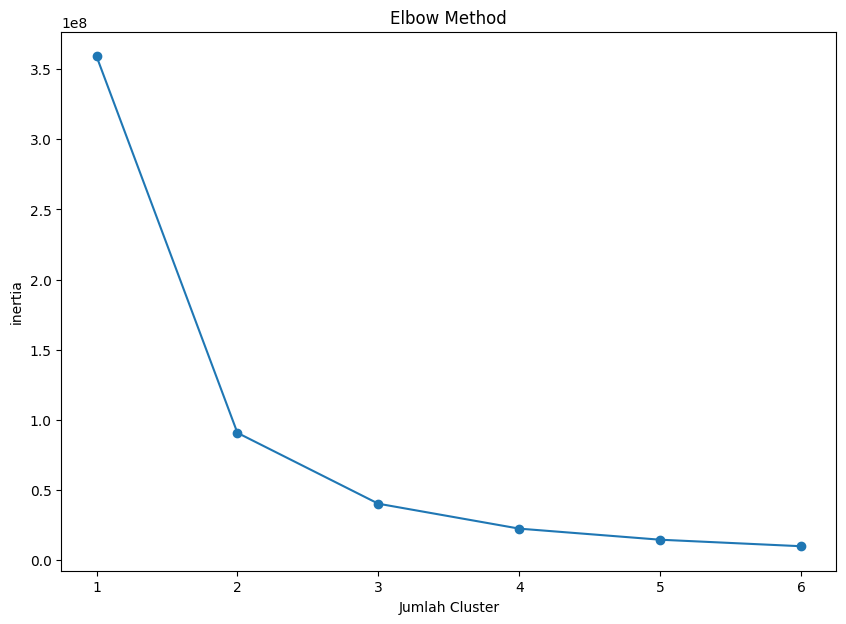

In [12]:
cluster = range(1,7)
inertias = []

for n in cluster :
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)
    
plt.figure(figsize = (10,7))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("inertia")
plt.title("Elbow Method")
plt.xticks(cluster)
plt.show()

# jumlah terbaik = 2

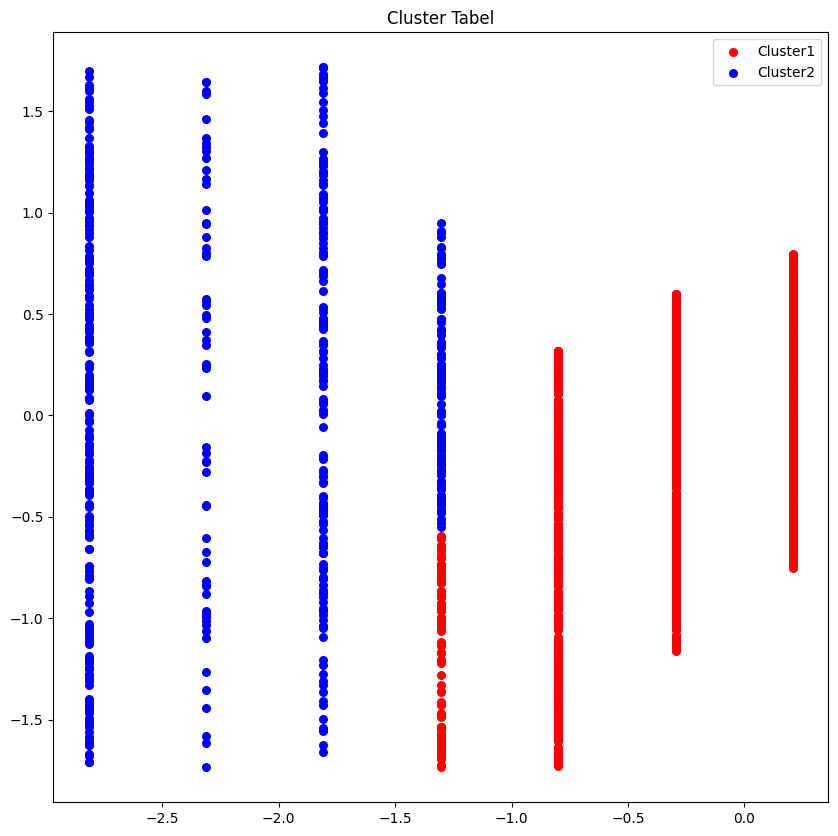

In [16]:
HC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

AC = HC.fit_predict(scaled)
#visualisasi cluster
plt.figure(figsize=(10,10))

#data point
plt.scatter(scaled[AC==0, 0],scaled[AC==0, 1], s=30, c='red', label ='Cluster1')
plt.scatter(scaled[AC==2, 0],scaled[AC==2, 1], s=30, c='blue', label ='Cluster2')

plt.title("Cluster Tabel")
plt.legend()
plt.show()

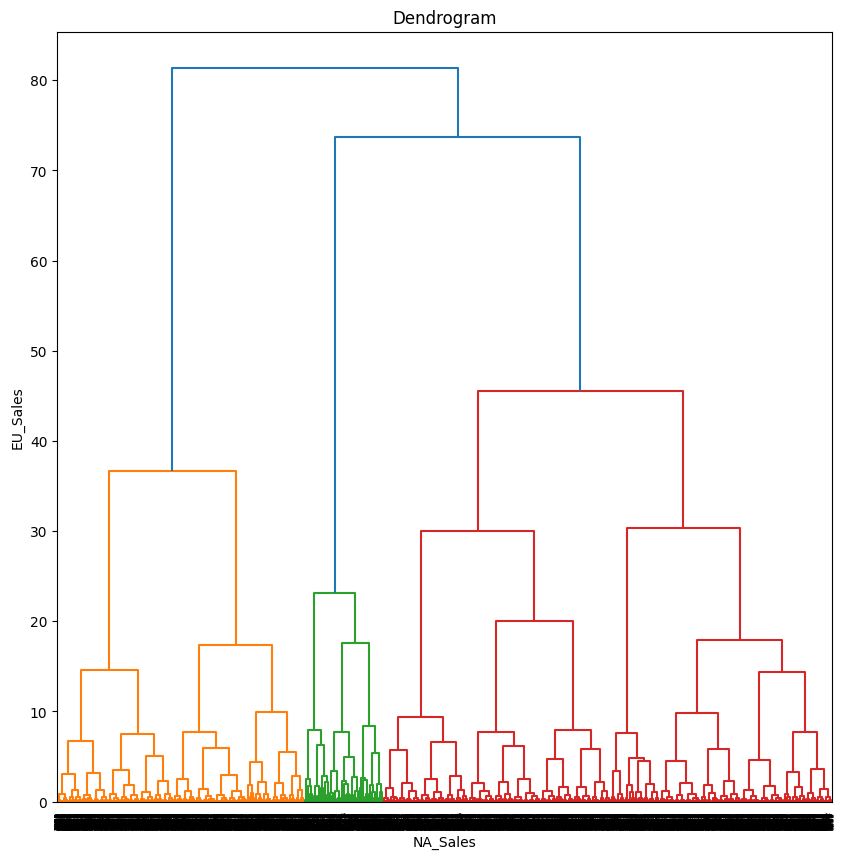

In [17]:
HR_linkrase = linkage(scaled, method='ward')
plt.figure(figsize=(10,10))
dendrogram(HR_linkrase)
plt.title("Dendrogram")
plt.xlabel("NA_Sales")
plt.ylabel("EU_Sales")
plt.show()